In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [4]:
def plot_data(X_train, y_train, title, mask = None):
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X_train[y_train == 1][:, 0],
        X_train[y_train == 1][:, 1],
        c="red",
        label="class 1",
        alpha=0.5,
    )
    plt.scatter(
        X_train[y_train == -1][:, 0],
        X_train[y_train == -1][:, 1],
        c="blue",
        label="class -1",
        alpha=0.5,
    )
    if mask is not None:
        plt.scatter(
            X_train[mask][:, 0],
            X_train[mask][:, 1],
            c="green",
            s=15,
            label="class svm",
        )

    plt.title(title)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot()

In [29]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.9)
y = y * 2 - 1  # преобразование меток из {0, 1} в {-1, 1}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Визуализация датасета

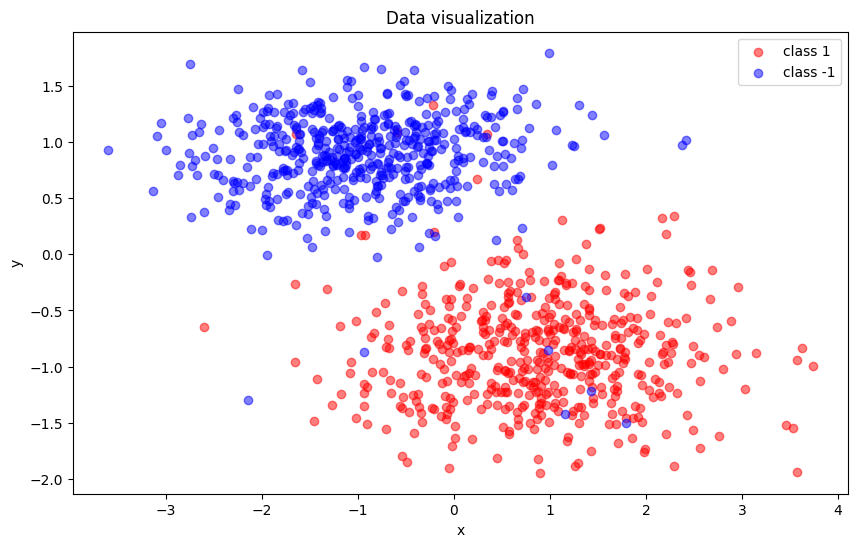

In [30]:
plot_data(X, y, "Data visualization")

# Модель с линейным ядром

In [31]:
from svm import SVM, LinearKernel, SquaredKernel, RBFKernel
from utils import MetricsEstimator


model = SVM(1, LinearKernel())
lambdas, mask = model.fit(X_train, y_train, maxiter=1000, ftol=1e-3)

### Распределение лямбд

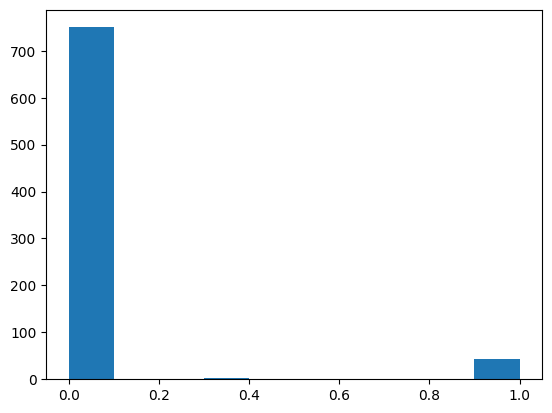

In [32]:
plt.hist(lambdas, bins=10)
plt.grid
plt.show()

### Оценка метрик на тестовой выборке

In [33]:
predictions = []
for elem in X_test:
    predictions.append(model.predict(elem))

metric_estimator = MetricsEstimator()
metric_estimator.get_metrics(y_test, np.array(predictions).astype(int))
print(metric_estimator)

accuracy = 0.96
precision = 0.9375
recall = 0.9782608695652174
f1_score = 0.9574468085106383


### Визуализация опорных векторов

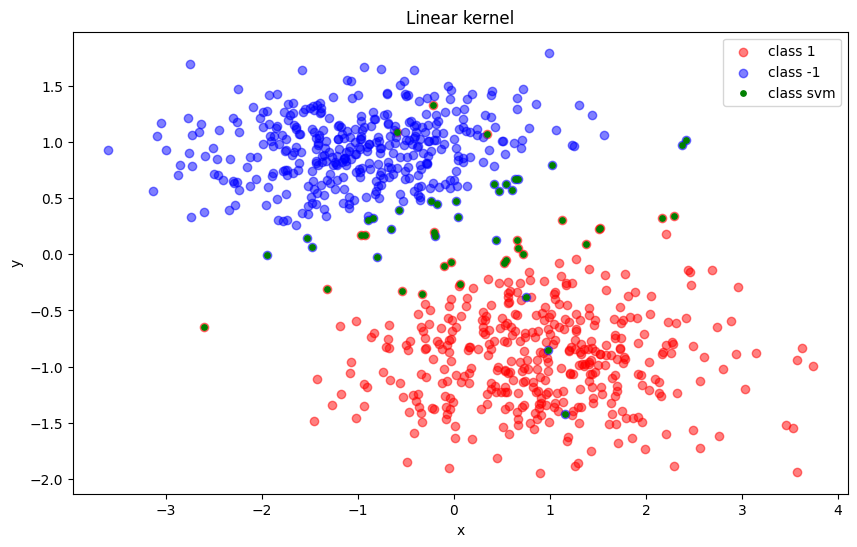

In [34]:
plot_data(X_train, y_train, "Linear kernel", mask)

# Модель с квадратичным ядром

In [35]:
model = SVM(1, SquaredKernel())
lambdas, mask = model.fit(X_train, y_train, maxiter=1000, ftol=1e-3)

### Распределение лямбд

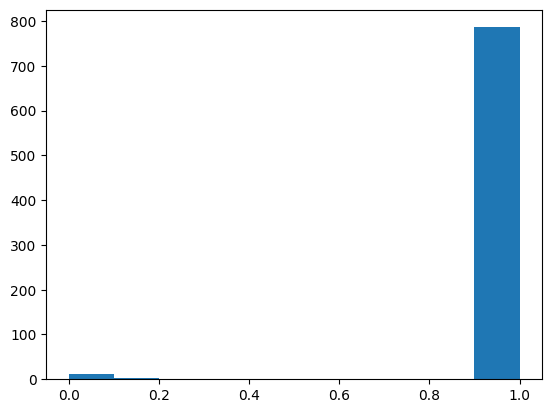

In [36]:
plt.hist(lambdas, bins=10)
plt.grid
plt.show()

### Оценка метрик на тестовой выборке

In [37]:
predictions = []
for elem in X_test:
    predictions.append(model.predict(elem))

metric_estimator = MetricsEstimator()
metric_estimator.get_metrics(y_test, np.array(predictions).astype(int))
print(metric_estimator)

accuracy = 0.54
precision = 0.5
recall = 0.40217391304347827
f1_score = 0.4457831325301205


### Визуализация опорных векторов

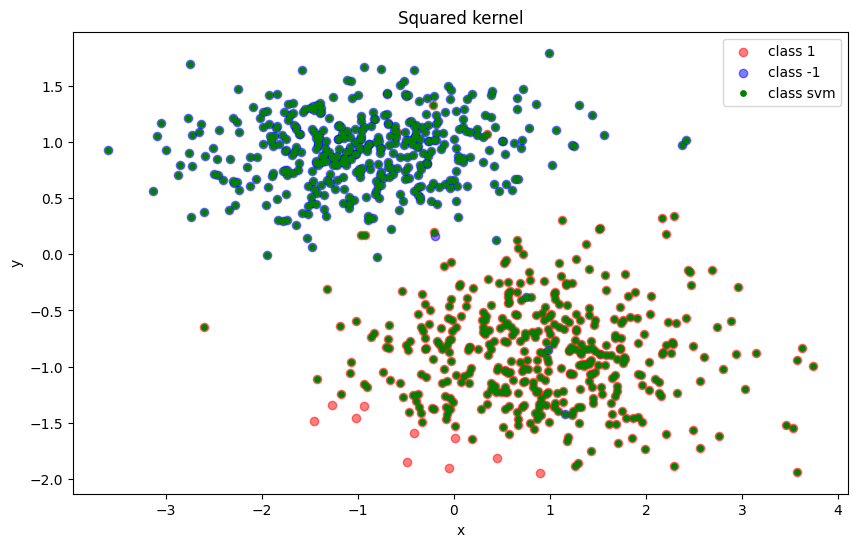

In [38]:
plot_data(X_train, y_train, "Squared kernel", mask)

# Модель с RBF-ядром

In [39]:
model = SVM(1, RBFKernel(gamma=1))
lambdas, mask = model.fit(X_train, y_train, maxiter=1000, ftol=1e-3)

### Распределение лямбд

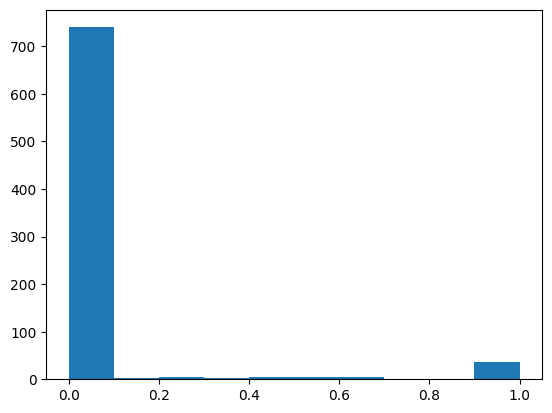

In [40]:
plt.hist(lambdas, bins=10)
plt.grid
plt.show()

### Оценка метрик на тестовой выборке

In [41]:
predictions = []
for elem in X_test:
    predictions.append(model.predict(elem[np.newaxis, :]))

metric_estimator = MetricsEstimator()
metric_estimator.get_metrics(y_test, np.array(predictions).astype(int))
print(metric_estimator)

accuracy = 0.96
precision = 0.9468085106382979
recall = 0.967391304347826
f1_score = 0.956989247311828


### Визуализация опорных векторов

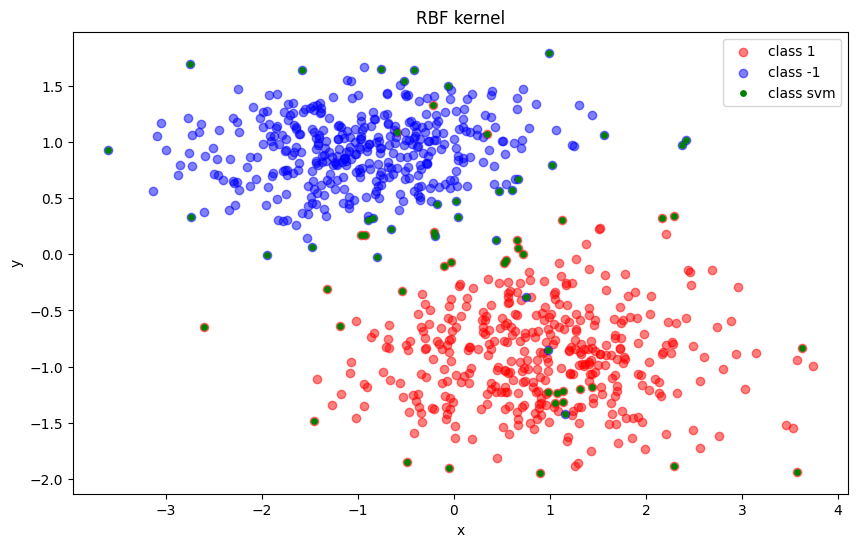

In [42]:
plot_data(X_train, y_train, "RBF kernel", mask)

# Сравнение с эталонным методом

In [43]:
from sklearn.svm import SVC


sklearn_model = SVC(kernel="linear")
sklearn_model.fit(X_train, y_train)

sklearn_predictions = sklearn_model.predict(X_test)
metric_estimator.get_metrics(y_test, sklearn_predictions.astype(int))

print(metric_estimator)

accuracy = 0.96
precision = 0.9468085106382979
recall = 0.967391304347826
f1_score = 0.956989247311828


### Визуализация опорных векторов

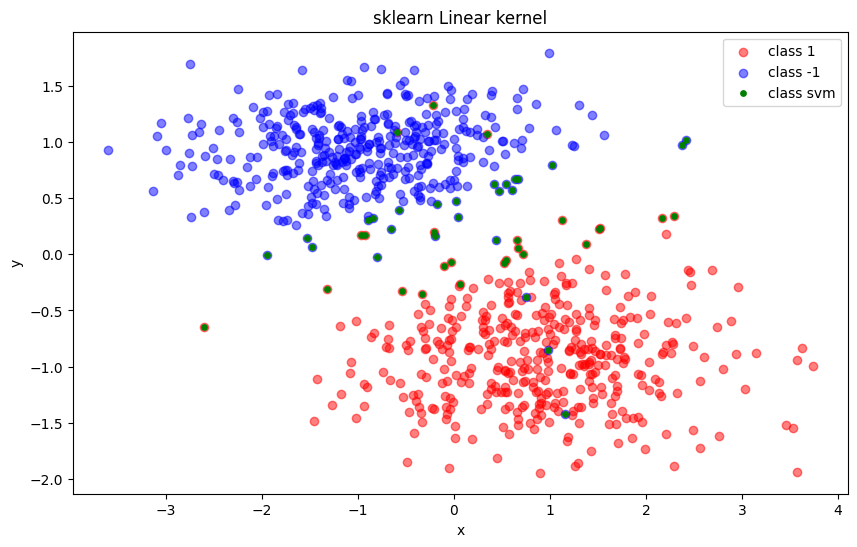

In [44]:
mask = np.isin(X_train, sklearn_model.support_vectors_).sum(axis=-1).astype(bool)
plot_data(X_train, y_train, "sklearn Linear kernel", mask)